In [1]:
import os
import math
import numpy as np
import pandas as pd

In [2]:
# Set the number of processor
p = 6
path = "../out"

In [3]:
# Devide the domain
# the deviding results should be same as that in the simulation code
def find_dimensions(p):
    min_gap = p;
    top = int(math.sqrt(p) + 1);
    for i in range(1, top + 1):
        if (p % i == 0):
            gap = abs(p / i - i);
            if (gap < min_gap):
                min_gap = gap;
                rows = i;
                columns = p / i;
    return int(rows), int(columns)

In [4]:
print("Deviding the domain according to the number of processors...")
print("The domain can be devided into: " + str(find_dimensions(p)[0]) + " * " + str(find_dimensions(p)[1]))

Deviding the domain according to the number of processors...
The domain can be devided into: 2 * 3


In [5]:
# For each time step, combine the results of each processor
rows, columns = find_dimensions(p)

# Get the filenames of each processor for every time step
filenames = os.listdir(path)
num_files = len(filenames)
num_combined_files = int(num_files / p)
for iter_cnt in range(num_combined_files):
    fname = "../out_combined/output_" + str(iter_cnt) + ".dat"
    df_file = pd.DataFrame()
    df_list = [rows, columns]
    
    # Scheduling files
    for i in range(rows):
        df_list[i] = []
        for j in range(columns):
            p_id = j + i * columns
            file_path = path + '/output_' + str(iter_cnt) + '_p' + str(p_id) + '.dat'
            df = pd.read_table(file_path, sep = '\t', header = None)
            df_list[i].append(df)
            df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
    df_img = pd.DataFrame()
    
    # Combining
    for i in range(rows):
        df_row = pd.DataFrame()
        for j in range(columns):
            df_row = pd.concat([df_row,df_list[i][j]], axis=1, ignore_index=True)
        df_img = pd.concat([df_img, df_row], ignore_index=True)
    df_img.to_csv(fname, sep='\t',index=0, header=0)

print("files combined finished!")

files combined finished!


<IPython.core.display.Javascript object>


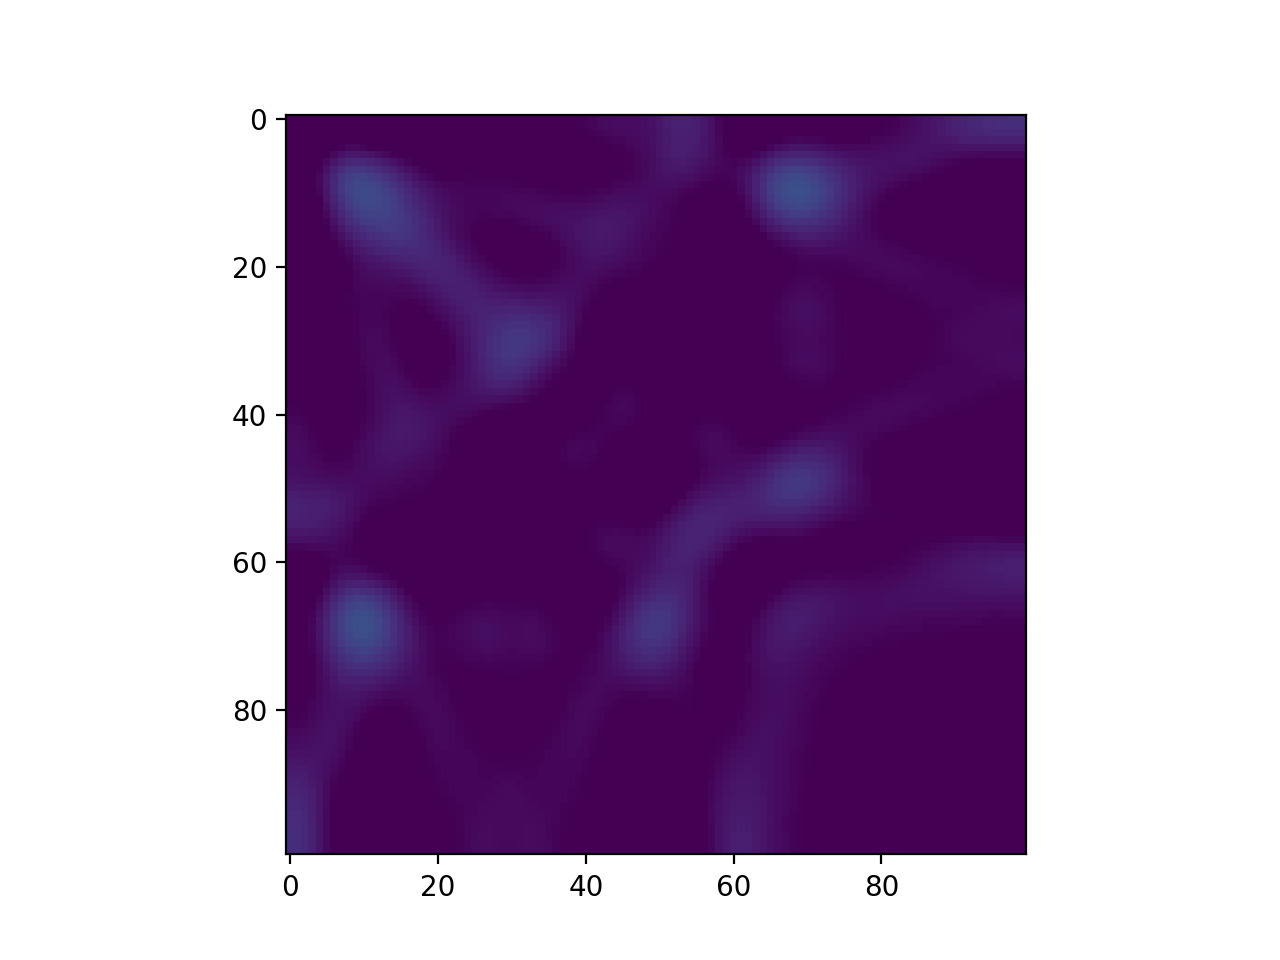

gif generation finished and saved in folder!


In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
fig = plt.figure()
img_list = []

for i in range(num_combined_files):
    df =  pd.read_table("../out_combined/output_"+ str(i) +".dat", header=None)
    data = df.values
    img_list.append(data)
    
img_num = len(img_list)

im = plt.imshow(img_list[0], animated=True)

def updatefig(frame,*args):
    im.set_array(img_list[frame])
    return im

ani = animation.FuncAnimation(fig, updatefig, frames=img_num, interval=50, blit=True)
ani.save('animation.gif', writer='pillow')
plt.show()
print("gif generation finished and saved in folder!")